This tutorial demonstrates how to visualize 3D tractography. The tutorial uses Python libraries like dipy for visualization, showing how to build a 3D scene that includes:

	1.	Tractography streamlines.
	2.	Anatomical brain slices.
	3.	3D representations of brain structures like the Thalamus or Brainstem.

The tutorial walks through each step involved in setting up the scene, adding different components (tracts, slices, structures), and adjusting the camera for a better view.

In [1]:
import os

from dipy.viz import window
from dipy.io.image import load_nifti
from tract_viz_utils import display_scene, hex_to_rgb, add_tract_to_scene, add_image_slice, add_brain, create_obj_file, obj_to_nv

## Step 1: Load the Diffusion Imaging Data

The first step involves loading the mean diffusivity (MD) image, which will serve as the reference image for adding tracts, slices, and brain structures.

In [2]:
# Define the current working directory (cwd)
current_dir = os.getcwd()

# Load the mean diffusivity image
md_image_path = os.path.join(current_dir, 'example', 'tract_visualization', 'GA24_md.nii.gz')
md_image_data, md_image_affine = load_nifti(md_image_path)

# Step 2: Initialize the 3D Visualization Scene

After loading the diffusion data, we initialize a 3D scene where all elements (tracts, slices, brain structures) will be rendered.

- window.Scene() creates a 3D rendering environment where actors (tracts, images, and brain structures) will be placed and visualized.

In [3]:
# Initialize the scene
scene = window.Scene()

## Step 3: Add the One Tract

In this step, we load and visualize one part of the Uncinate fasciculus (UF) tract. The UF tract is a white matter bundle connecting the frontal and temporal lobes. In this case, we do not set any color for the tract, thus it will automatically be color-coded based on directionality. 

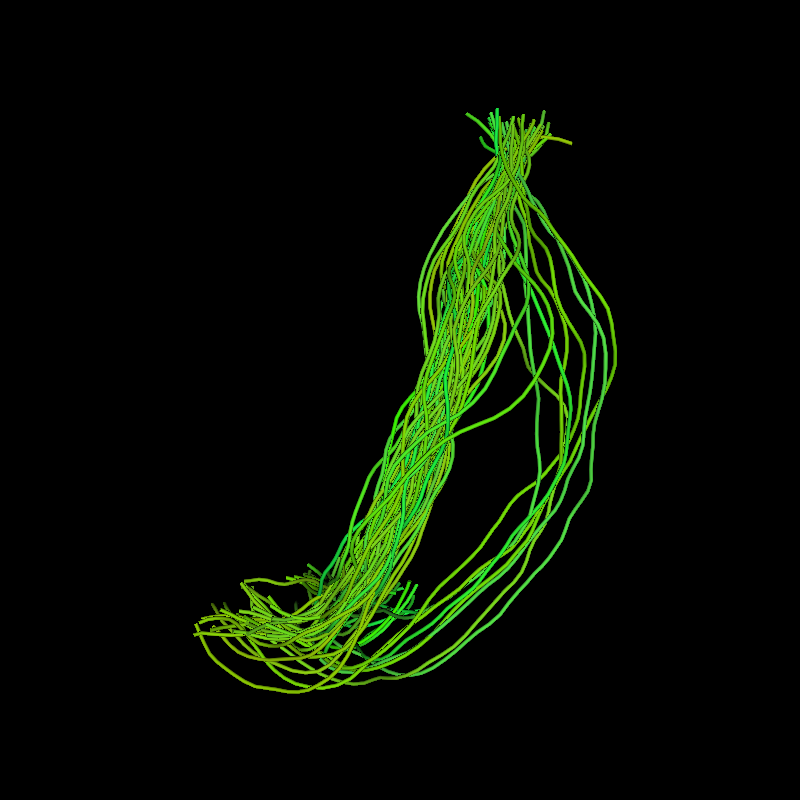

In [4]:
tract_1_path = os.path.join(current_dir, 'example', 'tract_visualization', 'GA24_UF.tck')
add_tract_to_scene(scene, tract_1_path, md_image_path)
display_scene(scene)  # Display the scene after adding the first tract

## Step 4: Add the another Tract with Custom Color

Here, we load and add a second tract with a custom color. In this case, we are adding some streamlines from the IFO. We first clear the scene to remove the previous tract and then add the new tract with a custom color. If you want to add more than one tract, just can skip the clear_scene() function.

The custom color is defined as a list of RGB values, where each value ranges from 0 to 1. For example, [1, 0, 0] represents red, [0, 1, 0] represents green, and [0, 0, 1] represents blue. A hex color code can be converted to RGB using the the hex_to_rgb() function.

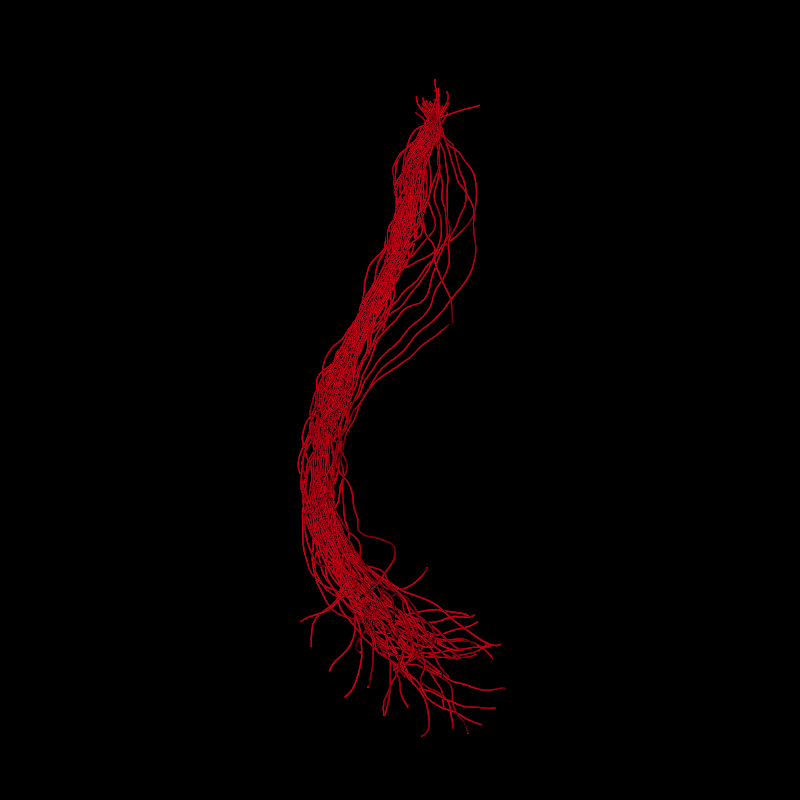

In [5]:
scene.clear()  # Clear the scene for the next steps

tract_2_path = os.path.join(current_dir, 'example', 'tract_visualization', 'GA24_IFO.tck')
tract_color = hex_to_rgb('#c90016')
add_tract_to_scene(scene, tract_2_path, md_image_path, color=tract_color)
display_scene(scene)  # Display the scene after adding the second tract

## Step 5: Set the Camera Position

To get a better perspective of the 3D scene, we adjust the camera position. In this case, we set the camera position to view the brain the right side.

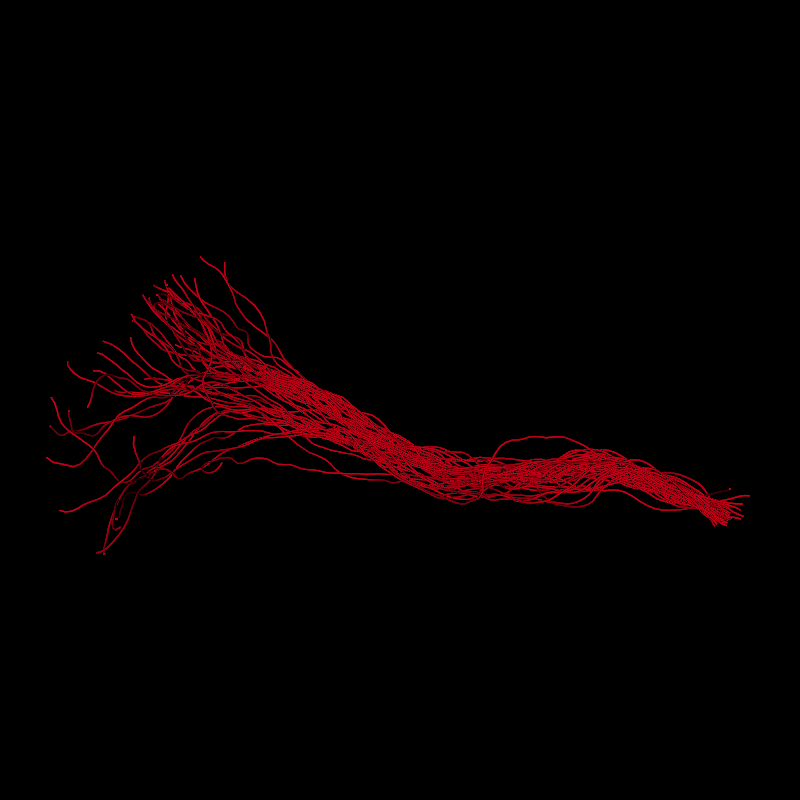

In [6]:
# Step 4: Set the camera position and display the final scene
camera_position = [1, 0, 0]
scene.set_camera(position=camera_position, focal_point=[0, 0, 0], view_up=[0, 0, 1])
display_scene(scene)  # Display the scene with the camera adjusted

- The focal point is set to [0, 0, 0] to focus on the center of the scene.
- view_up ensures that the top of the scene is aligned with the Z-axis.

In the context of the Fury library (which powers the dipy.viz module for visualization), the camera position is specified in a 3D coordinate system. Here’s an explanation of what the X, Y, and Z positions mean when setting the camera position:

1. X Position (Left-Right)

    - X represents the left-right axis in the scene.
    - A positive X value moves the camera to the right of the object being visualized.
    - A negative X value moves the camera to the left of the object.
    - For example, setting a positive X value will position the camera to the right of the object, giving a view from that side.

2. Y Position (Front-Back)

    - Y represents the front-back axis.
    - A positive Y value moves the camera above and in front of the object, as if you are viewing the object from the top/front.
    - A negative Y value moves the camera behind the object, giving a rear view.
    - This axis essentially controls how far forward or backward the camera is positioned relative to the object.

3. Z Position (Up-Down)

    - Z represents the up-down axis.
    - A positive Z value moves the camera above the object, as if you are looking down from above.
    - A negative Z value moves the camera below the object, giving an upwards view from the bottom.
    - The Z-axis helps control the elevation of the camera in the scene.

### Example Camera Position Interpretation:

If you set the camera position as [10, 10, 10], it means:

    - The camera is positioned 10 units to the right (X) of the object,
    - 10 units in front and above (Y) of the object,
    - 10 units above (Z) the object.

You would be looking at the object from a diagonal, upper-right, and front view. If you wanted to see the object directly from the top, you’d set a high Z value while setting X and Y close to zero (e.g., [0, 0, 200] would place the camera directly above the object).

Camera Axes Summary:

    - X Axis: Left (-X) ↔ Right (+X).
    - Y Axis: Back (-Y) ↔ Front (+Y).
    - Z Axis: Down (-Z) ↔ Up (+Z).

These axes allow you to control the perspective from which the camera views the scene, creating dynamic and flexible viewpoints of your 3D objects.

## Step 6: Add an Anatomical Slice

In this step, we add an anatomical slice from the mean diffusivity image. The slice is taken at position X=45, and window/level adjustments are applied for better contrast.

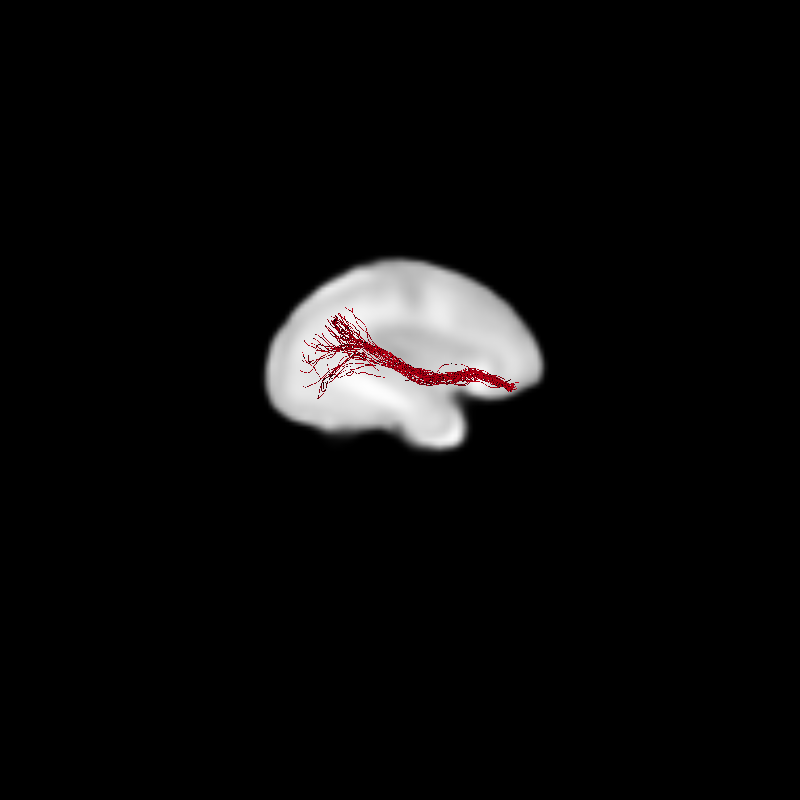

In [7]:
# Step 5: Add a slice at X=45 with window/level adjustments
window_size_value = 0.0020188
level_value = 0.0010094
slice_coordinates = {'x': 45}
add_image_slice(scene, md_image_data, md_image_affine, window_size=window_size_value, level=level_value, slice_coords=slice_coordinates)
display_scene(scene)  # Display the scene after adding the slice

- The slice is taken along the X-axis at position 45.
- window_size_value and level_value control the contrast and brightness of the slice.

If you want to save the scene as a png image, you can use the window.record() function. The function takes the filename as an argument and saves the scene as a PNG image.

In [8]:
scene_output = os.path.join(current_dir, 'example', 'tract_visualization', 'GA24_IFO.png')

window.record(scene, out_path=scene_output, size=(800, 800))

## Step 7 (Optional): Show tracts insdie a 3D brain model

In this step, we use a mean diffusivity image to create a 3D representation of the brain. A T2 image or other structural image in the same space could also be used. We create a new scene to show all the steps. The resulting 3D model can also be rotated by changing the position of the camera. 

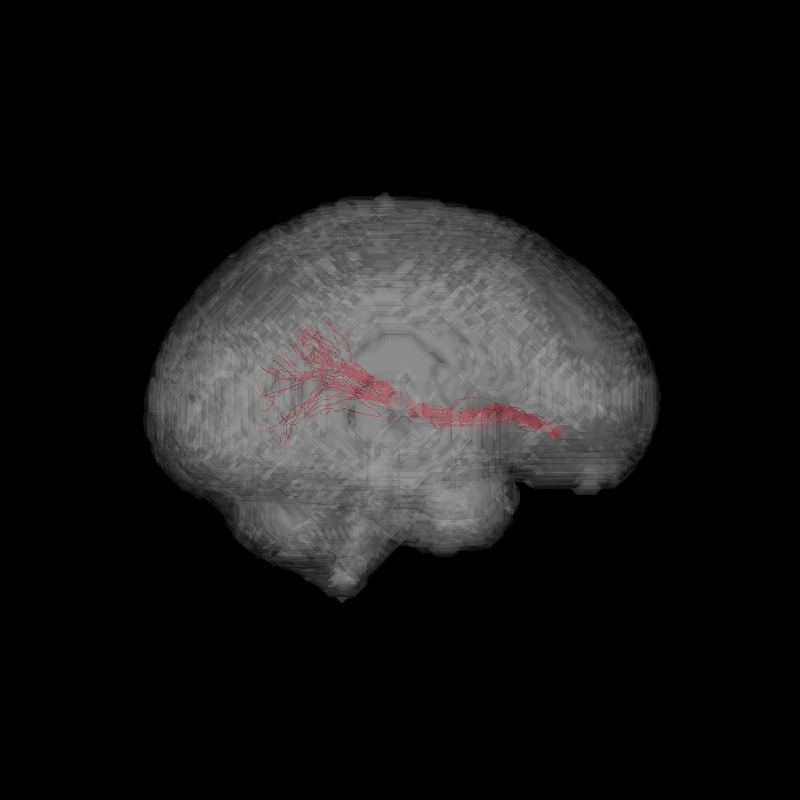

In [9]:
scene.clear()  # Clear the scene for the next steps

add_tract_to_scene(scene, tract_2_path, md_image_path, color=tract_color)
add_brain(scene, md_image_data, md_image_affine)
display_scene(scene)  # Display the scene with the brain

## Step 8 (optional) Create a 3D surface brain model 

In this step, we create a 3D surface brain model using a segmented brain image. The model is saved as a .obj file and can be loaded into a 3D visualization software like Blender for further editing or rendering. Or added to powerpoint presentations. In this example, we choose labels 112 and 113, which correspond to the left and right cortex.

We provide two arguments to the function: the segmented brain image path, and the "id" of the labels we want to include in the model. The "id" argument can be a single integer or a array of integers representing the labels we want to include in the model. The output file name should have the .obj extension.

In [10]:
import nibabel as nib
import trimesh

segmentation_image_path = os.path.join(current_dir, 'example', 'GA23_tissue.nii.gz')

# Create the .obj file
surface_file_path = create_obj_file(segmentation_image_path, labels=[112, 113])

# Visualize the surface in python
mesh = trimesh.load(surface_file_path)
mesh.show()

label2mesh: [WARNING] existing output files will be overwritten
label2mesh: [100%] uncompressing image "/var/folders/yb/q3h3yf_j1pq4j45vpj1fthv80000gn/T/tmppc8e5_mc.nii.gz"[0K
label2mesh: [100%] Importing label image[0K
label2mesh: [100%] Generating meshes from labels[0K
meshfilter: [WARNING] existing output files will be overwritten
meshfilter: [100%] Applying smoothing filter to multiple meshes[0K


Additionally, the model can ve converted to a .nv file to be used for generating visulizations in BrainNet viewer. The obj_to_nv receives the path to the obj file path and then converts it to a .nv file.

In [12]:
obj_to_nv(surface_file_path)